In [2]:
import math
import graphviz
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from IPython.display import SVG
from sklearn.metrics import classification_report 


df = pd.read_excel('../data/hawaii-5-11-22.xls', sheet_name='Complete')

In [13]:
primaries = df[[
    # "ISLAND",
    # "VOLCANO",
    "KEA LOA TREND",
    # Major Elements
    "SIO2(WT%)", 
    "AL2O3(WT%)",
    "TIO2(WT%)",
    "FeO*", 
    "CAO(WT%)", 
    "MGO(WT%)", 
    "K2O(WT%)", 
    "NA2O(WT%)",
    # Minor Elements
    # "P2O5(WT%)",
    # "MNO(WT%)", 
]]
primaries = primaries.dropna()
print('Number of samples:', len(primaries.index))
primaries.head()

Number of samples: 2909


,KEA LOA TREND,SIO2(WT%),AL2O3(WT%),TIO2(WT%),FeO*,CAO(WT%),MGO(WT%),K2O(WT%),NA2O(WT%)
0,2.0,49.09,9.79,1.68,10.855632,8.09,18.04,0.33,1.65
1,2.0,51.35,13.70,2.22,11.167376,10.52,6.46,0.62,2.46
2,2.0,51.40,13.86,2.22,10.962266,10.56,6.38,0.62,2.42
3,2.0,51.45,13.83,2.19,10.866694,10.58,6.50,0.57,2.46
4,2.0,51.00,14.15,2.19,10.571404,10.56,6.16,0.60,2.47


C:\Users\miroi\AppData\Local\Temp\ipykernel_24776\60276061.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  classifier.fit(data[0:][:train_size], shuffled[class_ident][:train_size])


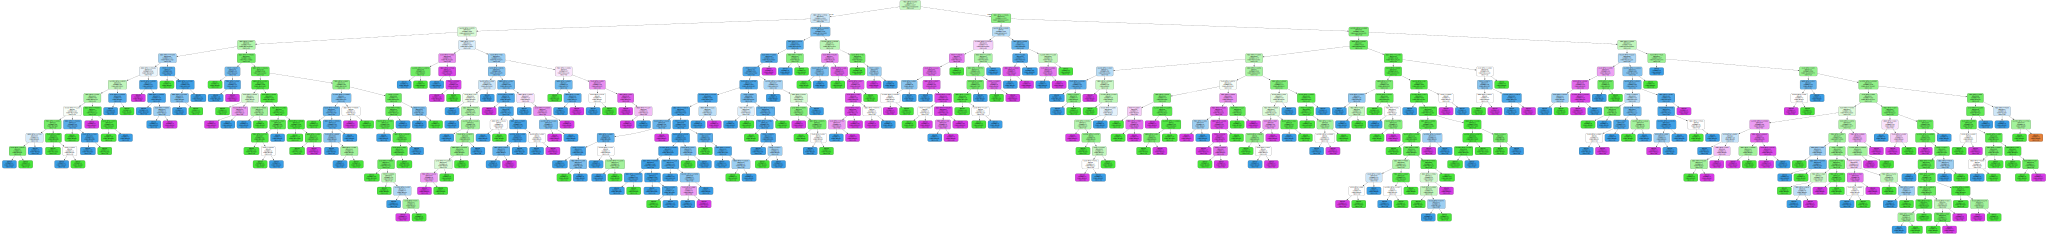

In [14]:
class_ident = 'KEA LOA TREND'

classifier = tree.DecisionTreeClassifier()
# shuffled = primaries.drop(['VOLCANO', 'ISLAND'], axis = 1).sample(frac=1)
shuffled = primaries.sample(frac = 1)

# Split data into training and test sets
train_size = math.floor(len(shuffled) * 0.8)
train = shuffled[:train_size]
test_count = len(shuffled) - train_size

data = shuffled.drop([class_ident], axis = 1)
classifier.fit(data[0:][:train_size], shuffled[class_ident][:train_size])

# plt.figure(figsize=(40,20))
# tree.plot_tree(classifier, fontsize=10)

dot_data = tree.export_graphviz(
    classifier, 
    out_file=None,
    feature_names=primaries.columns[1:],
    filled=True,
    rounded=True,
    class_names=[str(x) for x in primaries[class_ident].unique()],
)
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))

In [15]:
print(classification_report(
    shuffled[-test_count:][class_ident],
    classifier.predict(data[0:][-test_count:]),
    target_names = [str(x) for x in primaries[class_ident].unique()]
))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         0
         1.0       0.85      0.86      0.86       315
         3.0       0.83      0.77      0.80       199
         0.0       0.49      0.57      0.53        68

    accuracy                           0.80       582
   macro avg       0.55      0.55      0.55       582
weighted avg       0.81      0.80      0.80       582



c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
